In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.image as mpimg
import glob
%matplotlib inline

In [ ]:
data_dir = Path('data_dummy')
train_dir = data_dir / "train_input" / "resnet_features"
train_output_filename = data_dir / "train_output.csv"
train_output = pd.read_csv(train_output_filename)

filenames_train = [train_dir / "{}.npy".format(idx) for idx in train_output["ID"]]

max_tiles_nbr = 1000

features = []
for i, f in enumerate(filenames_train):
    patient_features = np.load(f)
    patient_features = patient_features[:, 3:]
    #np.set_printoptions(threshold=np.inf)
    #np.set_printoptions(suppress=True)
    pad_size = max_tiles_nbr - patient_features.shape[0]
    left_pad = pad_size // 2
    right_pad = pad_size // 2 + pad_size % 2
    padded_features = np.pad(patient_features, ((left_pad, right_pad), (0,0)), mode='constant', constant_values=(0,))

    if pad_size > 0:
        print(patient_features.shape)
        fig, ax = plt.subplots()
        plt.imshow(padded_features)

        padded_features = padded_features.transpose(1, 0)

        fig, ax = plt.subplots()
        plt.imshow(padded_features)




In [ ]:
import pickle
np.set_printoptions(threshold=np.inf)

results = pickle.load(open('results.p', "rb"))


In [ ]:
for id_key, res in results.items():
    print(id_key, res['prediction'])

In [38]:
def show_tiles(id_patient, tiles, i):
        for tile_meta in tiles:
            z, x, y = tile_meta[:3].astype(int)
            s = tile_meta[3]
            path = form.format(id = id_patient,zoom = z, x = x, y = y)
            g = glob.glob(path)[0]
            plt.subplot(4,5,i)
            plt.title("z={} x={} y={} s={:.3f}".format(z, x, y, s))
            plt.axis('off')
            plt.imshow(mpimg.imread(g))
            i += 1
        return i

def plot_bot_top_tiles(id_patient):
    res = results[id_patient]['tiles']
    sort = np.argsort(res[:, 3])

    bot_idx = sort[:10]
    top_idx = sort[-10:]
    top = res[top_idx]
    bot = res[bot_idx]

    
    form = 'data_images/test_input/{id}/{id}_tile_*_{zoom}_{x}_{y}.jpg'

    plt.rcParams["figure.figsize"] = [20, 10]

    i = 1
    i = show_tiles(id_patient, bot, i)
    i = show_tiles(id_patient, top, i)

ID_092 0.8855449


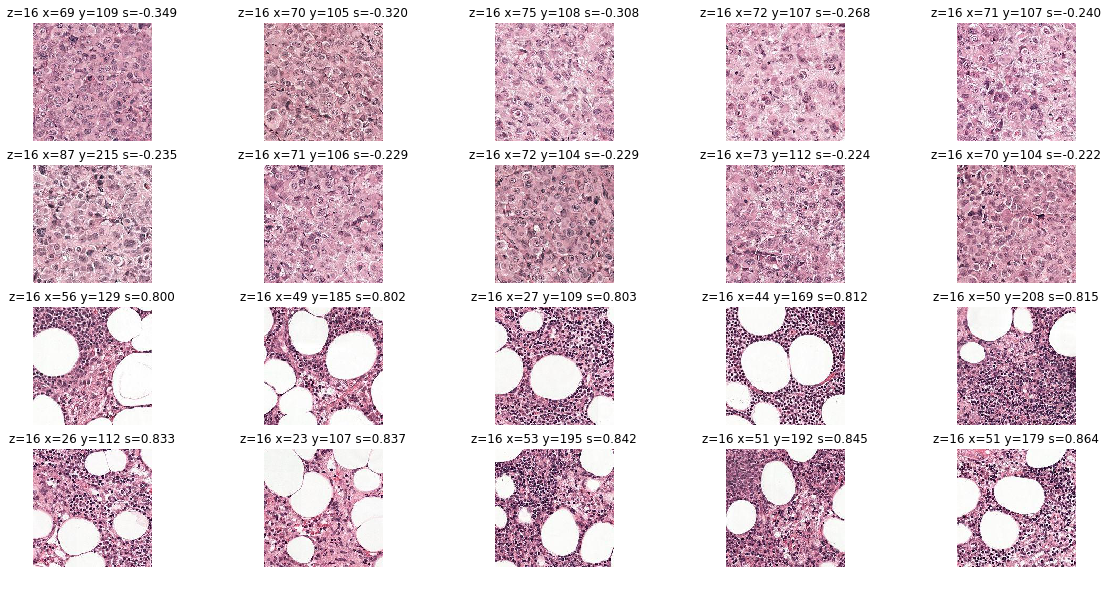

In [39]:
max_key = max(results, key=lambda id_key: results[id_key]['prediction'])
print(max_key, results[max_key]['prediction'])
plot_bot_top_tiles(max_key)

ID_028 0.12317406


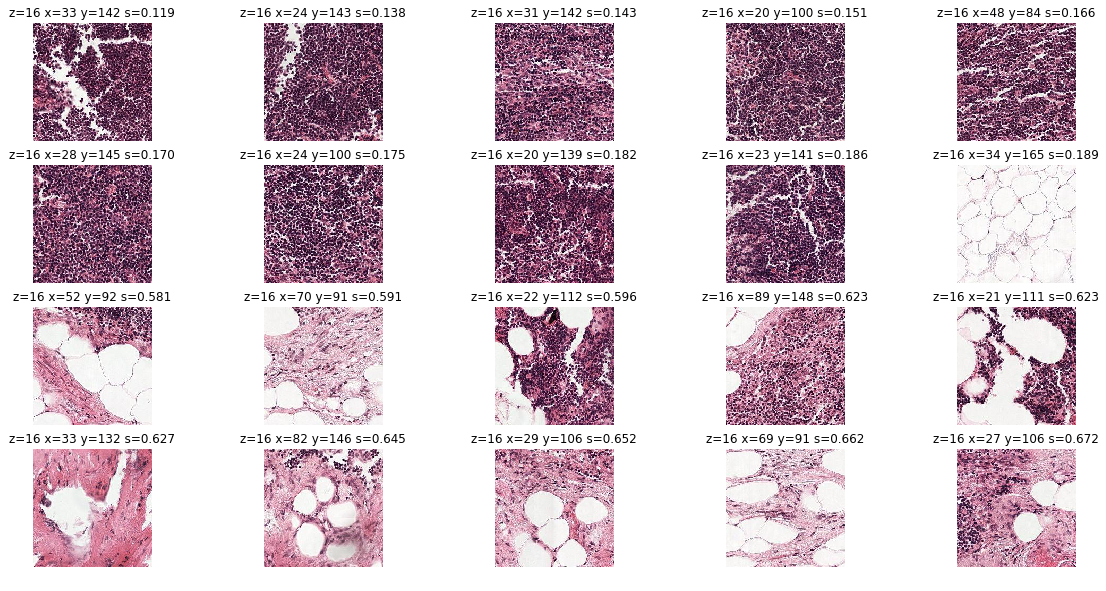

In [40]:
min_key = min(results, key=lambda id_key: results[id_key]['prediction'])
print(min_key, results[min_key]['prediction'])
plot_bot_top_tiles(min_key)